Majority voting with preprocessing

In [3]:
import nibabel as nib
import numpy as np
import os
import glob

def load_nifti(file_path):
    """Load a NIfTI file."""
    nifti_image = nib.load(file_path)
    return nifti_image.get_fdata()

def majority_voting(registered_labels):
    """Perform majority voting on a list of registered labels."""
    registered_labels_int = [labels.astype(int) for labels in registered_labels]
    stacked_labels = np.stack(registered_labels_int, axis=-1)
    return np.apply_along_axis(lambda x: np.bincount(x, minlength=4).argmax(), axis=-1, arr=stacked_labels)

# Base directory for the dataset
base_dir = '/Users/melikapooyan/Documents/elastix-5.0/Misa.course'

# Directory to save segmentation results
output_base_dir = '/Users/melikapooyan/Finalmisa(IBRS)/Second2.approach/seg.result'

# Validation cases
validation_cases = ['11', '12', '13', '14', '17']

for case in validation_cases:
    print(f"Processing validation case IBSR_{case}")

    # Path for the registered labels for this validation case
    case_folder = "Case " + case + (" " if case == '11' else "")
    registered_labels_dir = os.path.join(base_dir, "Second_approach", "preprocessed", case_folder, "resIBSR_*", "res_seg.IBSR*/result.nii")
    registered_labels_paths = glob.glob(registered_labels_dir)

    # Load all registered labels
    registered_labels = [load_nifti(path) for path in registered_labels_paths]

    # Perform majority voting
    segmentation_result = majority_voting(registered_labels)

    # Ensure output directory exists
    if not os.path.exists(output_base_dir):
        os.makedirs(output_base_dir)

    # Save the segmentation result
    output_path = os.path.join(output_base_dir, f"IBSR_{case}_segmented.nii.gz")
    original_image = nib.load(glob.glob(os.path.join(base_dir, "TVTSets", "pre.Validation_Set", f"IBSR_{case}", "*.nii.gz"))[0])
    nib.save(nib.Nifti1Image(segmentation_result, original_image.affine, original_image.header), output_path)

    print(f"Saved segmentation for validation case IBSR_{case} at {output_path}")


Processing validation case IBSR_11
Saved segmentation for validation case IBSR_11 at /Users/melikapooyan/Finalmisa(IBRS)/Second2.approach/seg.result/IBSR_11_segmented.nii.gz
Processing validation case IBSR_12
Saved segmentation for validation case IBSR_12 at /Users/melikapooyan/Finalmisa(IBRS)/Second2.approach/seg.result/IBSR_12_segmented.nii.gz
Processing validation case IBSR_13
Saved segmentation for validation case IBSR_13 at /Users/melikapooyan/Finalmisa(IBRS)/Second2.approach/seg.result/IBSR_13_segmented.nii.gz
Processing validation case IBSR_14
Saved segmentation for validation case IBSR_14 at /Users/melikapooyan/Finalmisa(IBRS)/Second2.approach/seg.result/IBSR_14_segmented.nii.gz
Processing validation case IBSR_17
Saved segmentation for validation case IBSR_17 at /Users/melikapooyan/Finalmisa(IBRS)/Second2.approach/seg.result/IBSR_17_segmented.nii.gz


Dice Coefficients for IBSR_11:
  CSF: 0.8381456452908653
  GM: 0.8546783076978653
  WM: 0.847110306770308


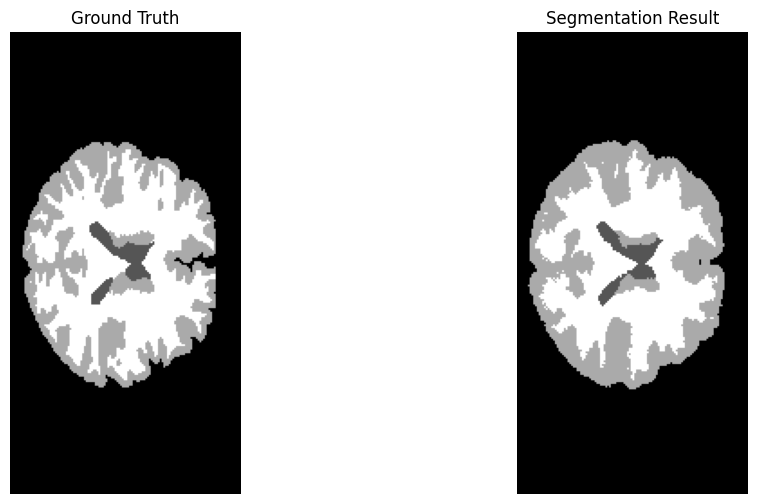

Dice Coefficients for IBSR_12:
  CSF: 0.8222287304144091
  GM: 0.8547935671745418
  WM: 0.8483990531806327


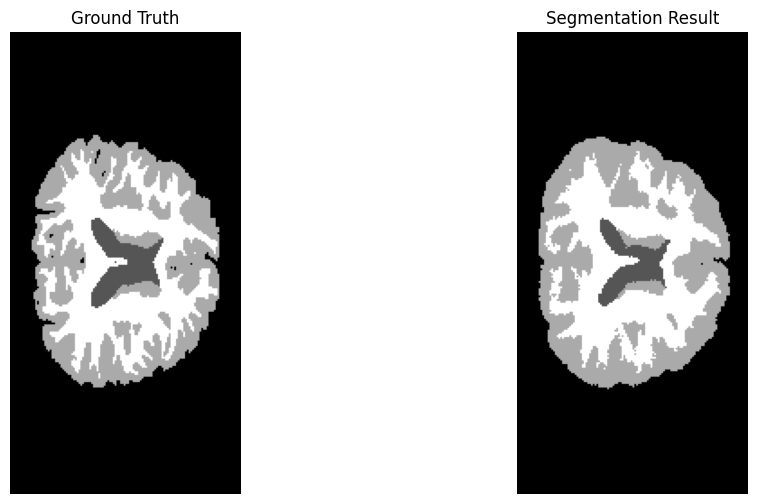

Dice Coefficients for IBSR_13:
  CSF: 0.7965494359654943
  GM: 0.877218001810054
  WM: 0.817321488188784


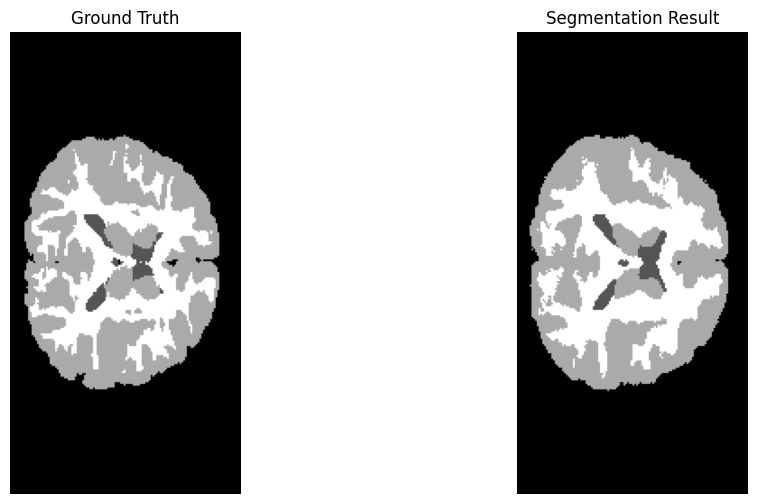

Dice Coefficients for IBSR_14:
  CSF: 0.8507947477539738
  GM: 0.8857673005838509
  WM: 0.8498711296108976


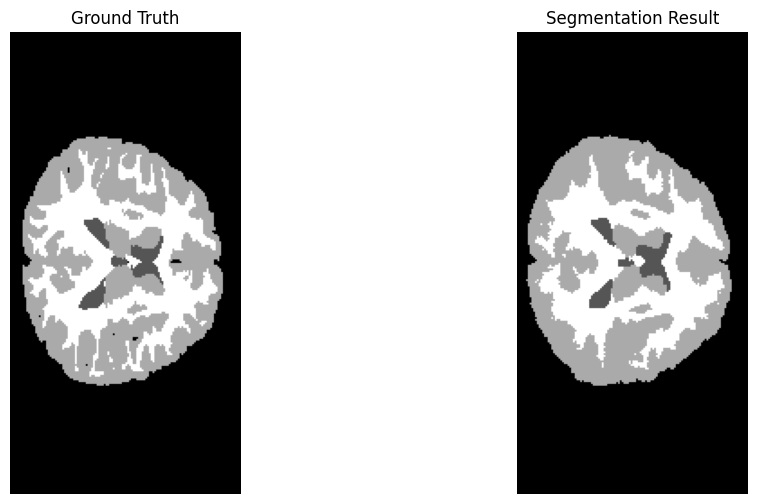

Dice Coefficients for IBSR_17:
  CSF: 0.8903525765207284
  GM: 0.8874508996467858
  WM: 0.8251723990189532


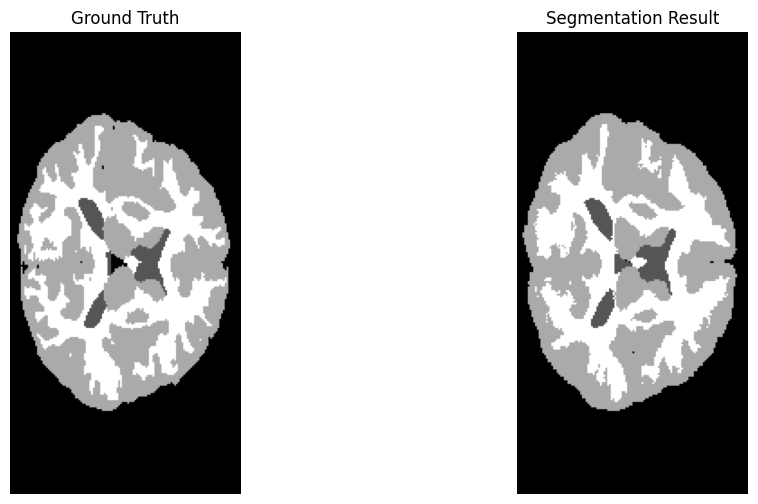


Overall Mean Dice Coefficient for each tissue type:
  CSF: 0.8396142271890941
  GM: 0.8719816153826196
  WM: 0.8375748753539151


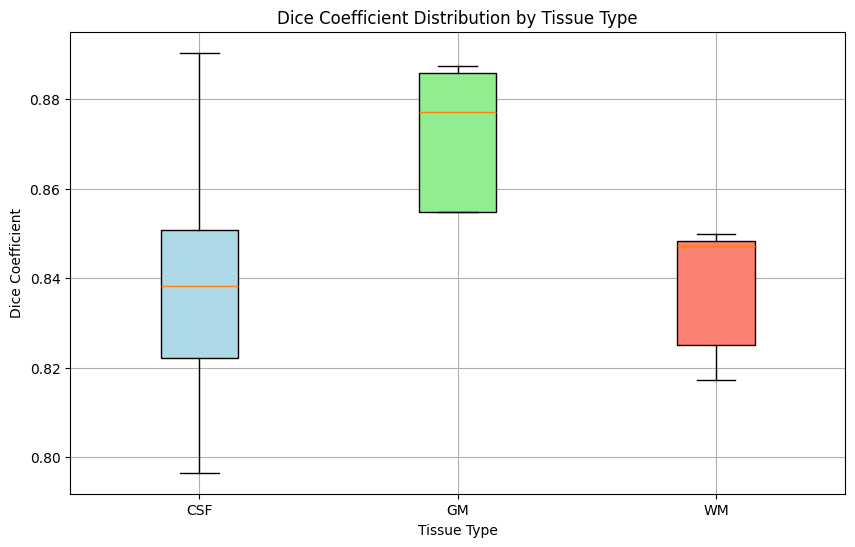

In [7]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt

def load_nifti(file_path):
    """Load a NIfTI file."""
    nifti_image = nib.load(file_path)
    return nifti_image.get_fdata()

def ensure_same_shape(img1, img2):
    """Ensure that two images have the same shape by removing any singleton dimensions."""
    return img1.squeeze(), img2.squeeze()

def dice_coefficient(im1, im2):
    """Calculate the Dice coefficient between two images."""
    im1, im2 = ensure_same_shape(im1, im2)
    im1 = np.where(im1 > 0, 1, 0)
    im2 = np.where(im2 > 0, 1, 0)
    intersection = np.sum(im1 * im2)
    total = np.sum(im1) + np.sum(im2)
    if total == 0:
        return 0
    dice_value = 2. * intersection / total
    return dice_value  # Removed the multiplication by 100

def calculate_tissue_dice(gt_img, seg_img, tissue_label):
    """Calculate the Dice coefficient for a specific tissue type."""
    gt_tissue = np.where(gt_img == tissue_label, 1, 0)
    seg_tissue = np.where(seg_img == tissue_label, 1, 0)
    return dice_coefficient(gt_tissue, seg_tissue)


def visualize_segmentation(gt_img, seg_img, slice_number):
    """Visualize the segmentation alongside the ground truth."""
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(gt_img[:, :, slice_number], cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(seg_img[:, :, slice_number], cmap='gray')
    plt.title('Segmentation Result')
    plt.axis('off')

    plt.show()

# Tissue labels with their names
tissue_labels = {'CSF': 1, 'GM': 2, 'WM': 3}

# Base directory for ground truth and segmentation results
gt_base_dir = '/Users/melikapooyan/Documents/elastix-5.0/Misa.course/TVTSets/pre.Validation_Set'
seg_base_dir = '/Users/melikapooyan/Finalmisa(IBRS)/Second2.approach/seg.result'
validation_cases = ['11', '12', '13', '14', '17']

# Specify the slice number to visualize
slice_number = 145

# Initialize a dictionary to store Dice coefficients for each tissue type
tissue_dice = {tissue: [] for tissue in tissue_labels.values()}

overall_mean_dice = {}

for case in validation_cases:
    gt_path = os.path.join(gt_base_dir, f'IBSR_{case}', f'IBSR_{case}_seg.nii.gz')
    seg_path = os.path.join(seg_base_dir, f'IBSR_{case}_segmented.nii.gz')

    if not os.path.exists(gt_path) or not os.path.exists(seg_path):
        print(f"Ground truth or segmentation file not found for case {case}. Skipping.")
        continue

    gt_img = load_nifti(gt_path)
    seg_img = load_nifti(seg_path)
    gt_img, seg_img = ensure_same_shape(gt_img, seg_img)

    print(f"Dice Coefficients for IBSR_{case}:")
    for tissue_name, label in tissue_labels.items():
        dice_score = calculate_tissue_dice(gt_img, seg_img, label)
        print(f"  {tissue_name}: {dice_score}")
        tissue_dice[label].append(dice_score)

    visualize_segmentation(gt_img, seg_img, slice_number)

# Calculate and print the mean Dice coefficient for each tissue
print("\nOverall Mean Dice Coefficient for each tissue type:")
for tissue_name, label in tissue_labels.items():
    mean_dice = np.mean(tissue_dice[label])
    overall_mean_dice[tissue_name] = mean_dice
    print(f"  {tissue_name}: {mean_dice}")

# Data for box plots
dice_data = [dice_values for dice_values in tissue_dice.values()]
labels = list(tissue_labels.keys())

# Define colors for each tissue type
colors = ['lightblue', 'lightgreen', 'salmon']

# Create box plots for Dice coefficients
plt.figure(figsize=(10, 6))
dice_box = plt.boxplot(dice_data, labels=labels, patch_artist=True)

# Apply colors
for patch, color in zip(dice_box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Dice Coefficient Distribution by Tissue Type')
plt.ylabel('Dice Coefficient')
plt.xlabel('Tissue Type')
plt.grid(True)
plt.show()


Case IBSR_11:
  CSF Hausdorff Distance: 31.70567772497538
  GM Hausdorff Distance: 10.547511554864494
  WM Hausdorff Distance: 10.547511554864494
Case IBSR_12:
  CSF Hausdorff Distance: 24.88473427625861
  GM Hausdorff Distance: 7.762087348130012
  WM Hausdorff Distance: 9.0
Case IBSR_13:
  CSF Hausdorff Distance: 11.25
  GM Hausdorff Distance: 10.250952699627485
  WM Hausdorff Distance: 11.782700507523732
Case IBSR_14:
  CSF Hausdorff Distance: 26.065197702108456
  GM Hausdorff Distance: 6.825103021200486
  WM Hausdorff Distance: 9.744589845139712
Case IBSR_17:
  CSF Hausdorff Distance: 28.175965617211038
  GM Hausdorff Distance: 11.273226430210567
  WM Hausdorff Distance: 8.279854561374966

Mean Hausdorff Distance for each tissue type:
  CSF: 24.416315064110695
  GM: 9.33177621080661
  WM: 9.87093129378058


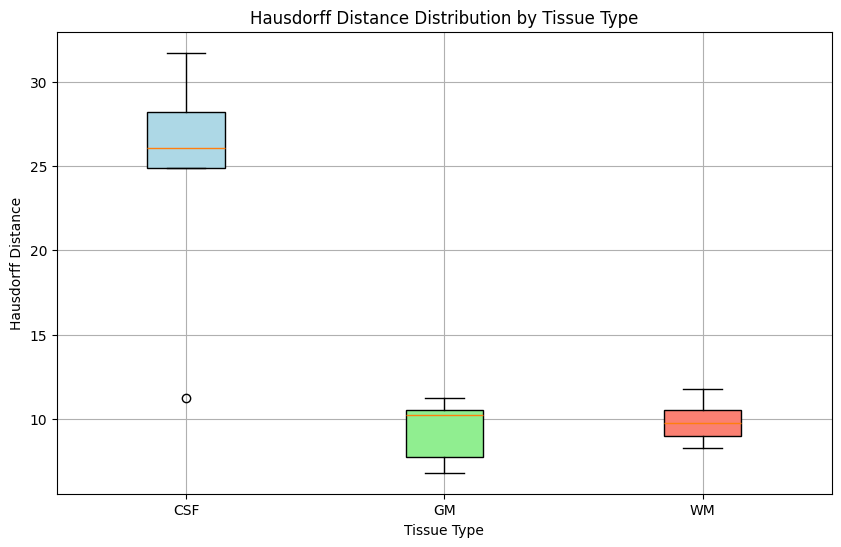

In [8]:
import SimpleITK as sitk
import numpy as np
import nibabel as nib
import os

def load_nifti(file_path):
    """Load a NIfTI file and return a NumPy array, affine and header."""
    nifti_image = nib.load(file_path)
    return nifti_image.get_fdata(), nifti_image.affine, nifti_image.header

import SimpleITK as sitk
import numpy as np

def sitk_like(np_array, reference_sitk_img):
    """Convert a NumPy array to a SimpleITK Image, matching the reference image."""
    sitk_img = sitk.GetImageFromArray(np_array)
    sitk_img.CopyInformation(reference_sitk_img)
    return sitk_img

def compute_hausdorff(groundT, segmentation, reference_sitk):
    """Compute Hausdorff distance between ground truth and segmentation."""
    HD_distances = []

    # Adjust the check for single-channel images
    if groundT.ndim == 4 and groundT.shape[-1] == 1:
        groundT = groundT[..., 0]
    if segmentation.ndim == 4 and segmentation.shape[-1] == 1:
        segmentation = segmentation[..., 0]

    if groundT.ndim != 3 or segmentation.ndim != 3:
        raise ValueError("Input images must be single-channel (grayscale) and 3D.")

    for tissue in range(1, 4):  # Assuming three tissues are labeled as 1, 2, and 3
        # Convert images to SimpleITK format
        groundT_tissue = (groundT == tissue).astype(np.uint8)
        groundT_tissue_sitk = sitk_like(groundT_tissue, reference_sitk)
        segmentation_tissue = (segmentation == tissue).astype(np.uint8)
        segmentation_tissue_sitk = sitk_like(segmentation_tissue, reference_sitk)

        # Define the Hausdorff distance filter
        hausdorff_distance_filter = sitk.HausdorffDistanceImageFilter()

        # Compute distance
        hausdorff_distance_filter.Execute(groundT_tissue_sitk, segmentation_tissue_sitk)
        distance = hausdorff_distance_filter.GetHausdorffDistance()

        # Append to list
        HD_distances.append(distance)

    return HD_distances


# Tissue name mapping
tissue_names = {1: 'CSF', 2: 'GM', 3: 'WM'}

if __name__ == "__main__":
    validation_cases = ['11', '12', '13', '14', '17']
    base_dir = '/Users/melikapooyan/Documents/elastix-5.0/Misa.course/IBSR/Validation_Set'
    seg_dir = '/Users/melikapooyan/Finalmisa(IBRS)/Second2.approach/seg.result'

    # Initialize a dictionary to store Hausdorff distances for each tissue type
    tissue_hd = {1: [], 2: [], 3: []}

    for case in validation_cases:
        groundT_path = os.path.join(base_dir, f'IBSR_{case}', f'IBSR_{case}_seg.nii.gz')
        segmentation_path = os.path.join(seg_dir, f'IBSR_{case}_segmented.nii.gz')

        # Load ground truth and segmentation
        groundT, affine, _ = load_nifti(groundT_path)
        segmentation, _, _ = load_nifti(segmentation_path)

        # Use the ground truth as the reference SimpleITK image
        reference_sitk_image = sitk.GetImageFromArray(groundT.astype(np.uint8))
        reference_sitk_image.SetSpacing((affine[0,0], affine[1,1], affine[2,2]))

        # Compute Hausdorff distances
        hausdorff_distances = compute_hausdorff(groundT, segmentation, reference_sitk_image)

        # Print Hausdorff distances for the current case
        print(f"Case IBSR_{case}:")
        for tissue_type, hd in enumerate(hausdorff_distances, start=1):
            print(f"  {tissue_names[tissue_type]} Hausdorff Distance: {hd}")
            tissue_hd[tissue_type].append(hd)

    # Calculate and print the mean Hausdorff distance for each tissue
    print("\nMean Hausdorff Distance for each tissue type:")
    for tissue_type, distances in tissue_hd.items():
        mean_hd = np.mean(distances)
        print(f"  {tissue_names[tissue_type]}: {mean_hd}")


    # Data for box plots
hd_data = [distances for distances in tissue_hd.values()]
labels = list(tissue_names.values())

# Define colors for each tissue type
colors = ['lightblue', 'lightgreen', 'salmon']

# Create box plots for Hausdorff distances
plt.figure(figsize=(10, 6))
hd_box = plt.boxplot(hd_data, labels=labels, patch_artist=True)

# Apply colors
for patch, color in zip(hd_box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Hausdorff Distance Distribution by Tissue Type')
plt.ylabel('Hausdorff Distance')
plt.xlabel('Tissue Type')
plt.grid(True)
plt.show()